In [381]:
##########################################Описание задачи###############################################
#Классифицировать жанр(Хип-хоп или Рок) входной песни, неслушая её, основываясь на загруженном датасете.
########################################################################################################
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline             
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения




In [382]:
url = "https://raw.githubusercontent.com/mercy131/ML_LABS/master/songs.csv"

In [383]:
data_raw = pd.read_csv(url)

In [384]:
data_raw.shape

(17734, 21)

In [385]:
# track_id id каждого трека
# bit_rate количество бит, используемых для обработки/передачи данных за ед. времени
# genre_top жанр (рок, хип-хоп)
# listens  прослушивания 
# data_created дата создания трека
# data_recorded дата записи песни
# language_code код страны создания песни
# license орг., которая выдала лицензию 
# и т.д
data_raw.head() # покажем начало данных



,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [386]:
data_raw.tail() # покажем конец


,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy
17733,155247,320000,0,Fleslit,2017-03-29 01:40:28,NaN,211,3,Hip-Hop,"[21, 539, 811]",...,NaN,1379,NaN,Attribution,1025,NaN,0,Fleslit,"['instrumental trap beat', 'love', 'instrument...",Love In The Sky


In [387]:


data_raw.columns #  вывод имеющихся признаков 



Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [388]:
data_raw.index


RangeIndex(start=0, stop=17734, step=1)

In [389]:
data_raw['genre_top'] = data_raw['genre_top'].astype('category')
data_raw['composer'] = data_raw['composer'].astype('category')
data_raw['date_recorded'] = data_raw['date_recorded'].astype('category')
data_raw['information'] = data_raw['information'].astype('category')
data_raw['language_code'] = data_raw['language_code'].astype('category')
data_raw['license'] = data_raw['license'].astype('category')
data_raw['lyricist'] = data_raw['lyricist'].astype('category')
data_raw['publisher'] = data_raw['publisher'].astype('category')
data_raw['genre_top'].dtype
data_raw['genre_top'].value_counts()




Rock       14182
Hip-Hop     3552
Name: genre_top, dtype: int64

In [390]:
data_raw.describe() # Основные характеристики

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [391]:
data_raw.describe(include=['category'])

,composer,date_recorded,genre_top,information,language_code,license,lyricist,publisher
count,166,1898,17734,482,4089,17714,53,52
unique,55,196,2,110,13,58,12,15
top,Mors Ontologica,2008-11-26 00:00:00,Rock,"<p><a href=""http://www.myspace.com/theshambler...",en,Attribution-Noncommercial-No Derivative Works ...,Yshwa,Cherry Red Music (UK)
freq,14,216,14182,22,3897,3731,13,20


In [392]:
corr_mat = data_raw.corr()
corr_mat # корреляция
# самые высокие значения корреляции достигаются между признаками interst и listens, что очивидно
# так же высокие значения достигаются для признаков favorites и interest

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
track_id,1.000000,0.240970,0.002342,-0.029592,-0.010985,0.004141,0.038695,0.030860
bit_rate,0.240970,1.000000,-0.002230,0.023969,-0.001800,-0.022650,-0.017140,0.074227
comments,0.002342,-0.002230,1.000000,0.023166,0.630017,0.417699,0.412506,-0.017872
duration,-0.029592,0.023969,0.023166,1.000000,0.008260,-0.005068,-0.004090,-0.039274
favorites,-0.010985,-0.001800,0.630017,0.008260,1.000000,0.667735,0.677138,-0.038298
interest,0.004141,-0.022650,0.417699,-0.005068,0.667735,1.000000,0.945520,-0.017139
listens,0.038695,-0.017140,0.412506,-0.004090,0.677138,0.945520,1.000000,-0.022499
number,0.030860,0.074227,-0.017872,-0.039274,-0.038298,-0.017139,-0.022499,1.000000


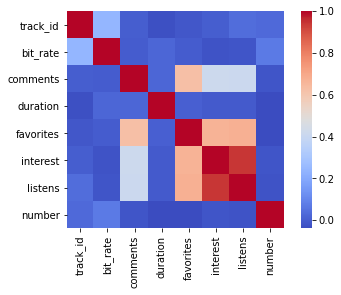

In [393]:

#Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass





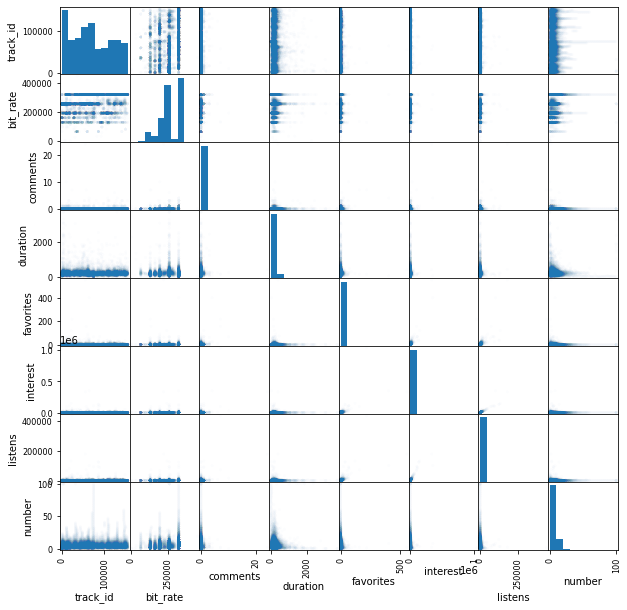

In [394]:

from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass
# графики разброса для каждой пары



In [395]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)



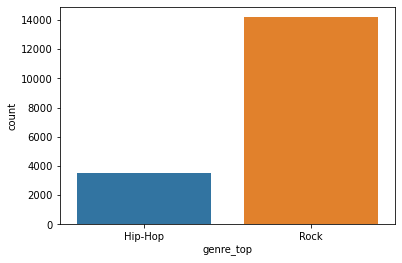

In [396]:
# на данной диагрме хорошо видна несбалансровость классов.
sns.countplot(x='genre_top', data=data_raw)
pass

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


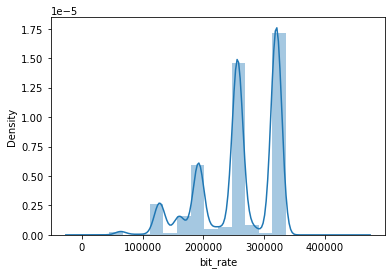

In [397]:

sns.distplot(data_raw['bit_rate'], bins = 20)
pass

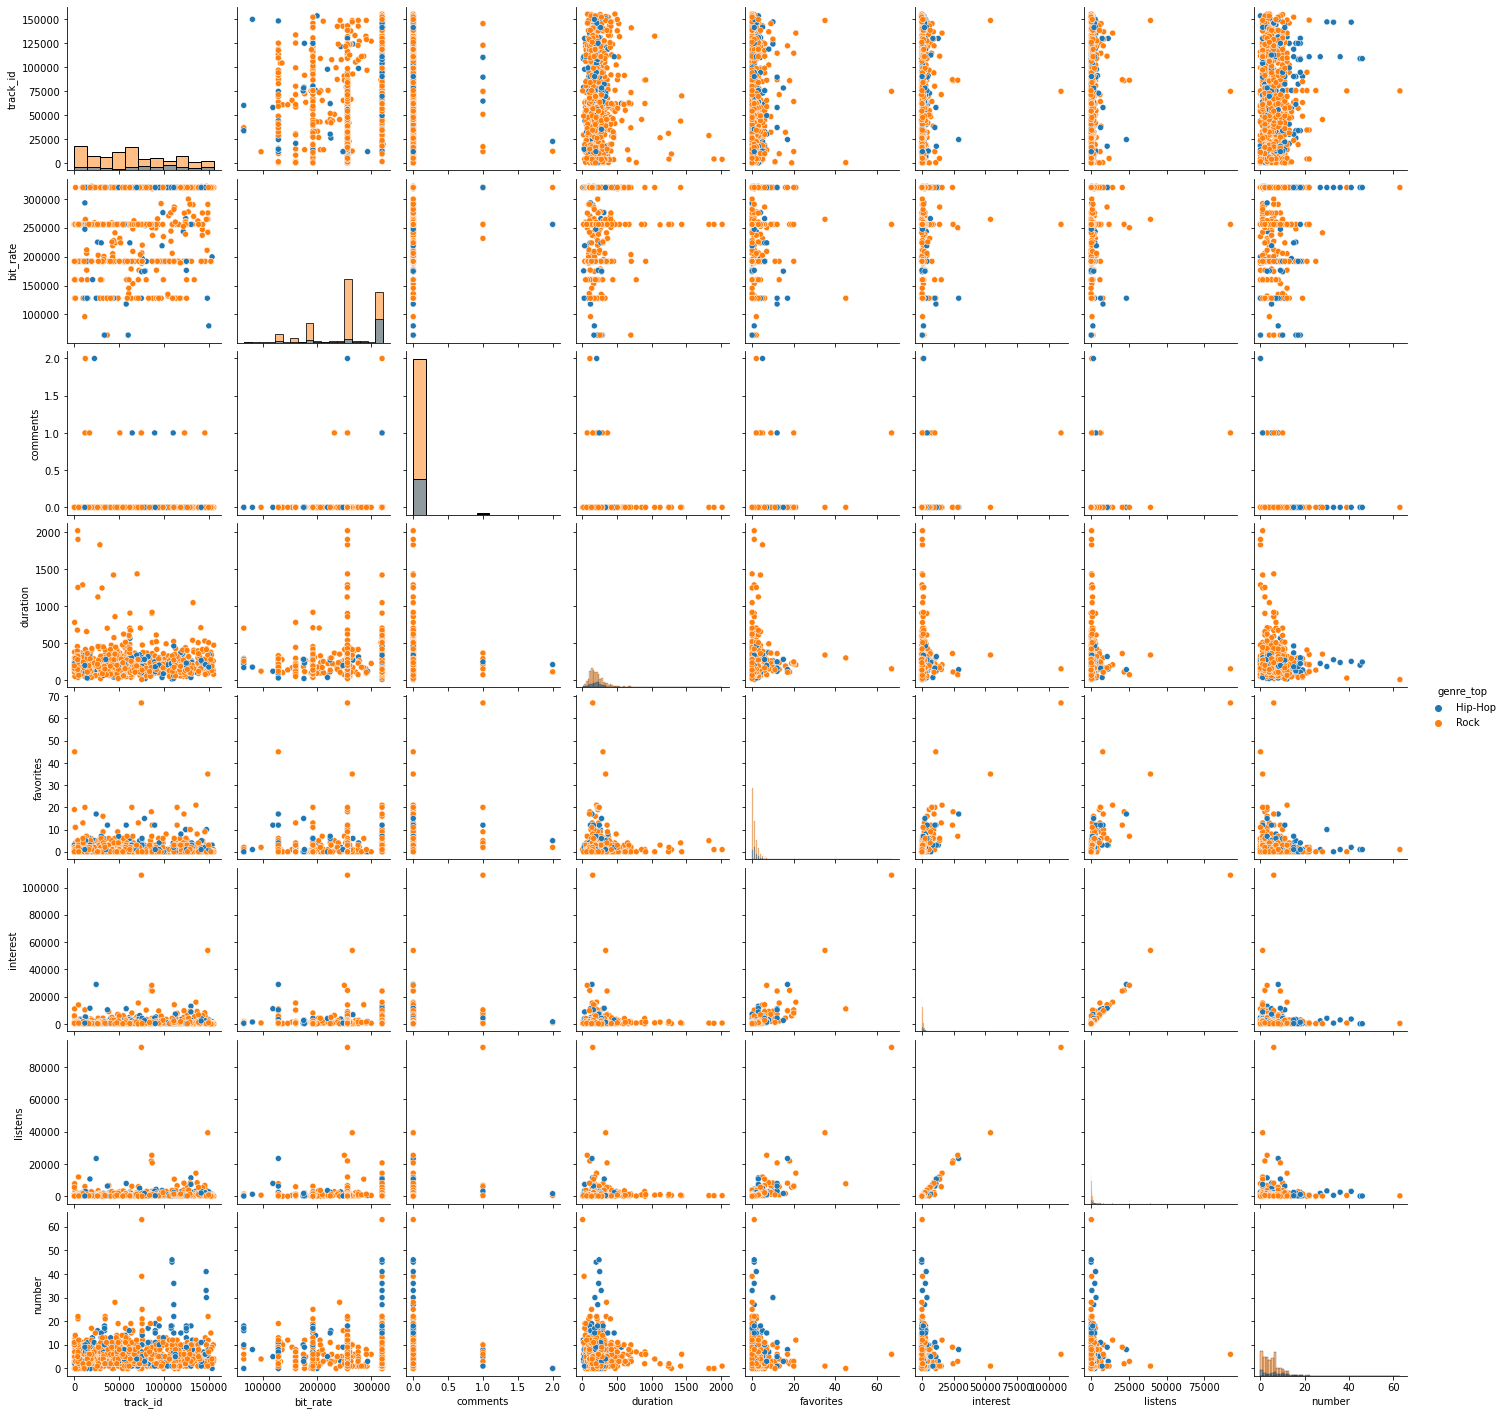

In [398]:
# для полной визуализации данных приведём ещё несколько возможных графиков. 
# построим для каждой пары график рассеивания 
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='genre_top', diag_kind='hist')
pass

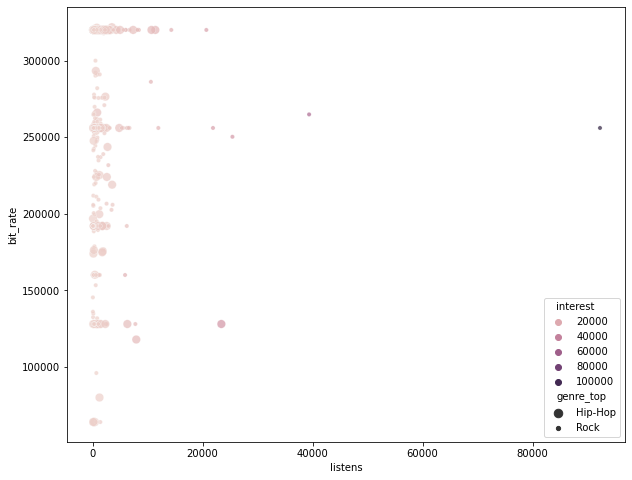

In [399]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='listens', y='bit_rate', size='genre_top', hue='interest', data=data_raw.iloc[random_subset], alpha=0.7)
pass

In [400]:
data_raw.isna().sum()


track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [401]:
data_raw['composer'].fillna(data_raw['composer'].mode().iloc[0], inplace=True)
data_raw['date_recorded'].fillna(data_raw['date_recorded'].mode().iloc[0], inplace=True)
data_raw['information'].fillna(data_raw['information'].mode().iloc[0], inplace=True)
data_raw['language_code'].fillna(data_raw['language_code'].mode().iloc[0], inplace=True)
data_raw['lyricist'].fillna(data_raw['lyricist'].mode().iloc[0], inplace=True)
data_raw['publisher'].fillna(data_raw['publisher'].mode().iloc[0], inplace=True)
data_raw['license'].fillna(data_raw['license'].mode().iloc[0], inplace=True)
data_raw.isna().sum()
# покажем, что очистили данные от nan value


track_id         0
bit_rate         0
comments         0
composer         0
date_created     0
date_recorded    0
duration         0
favorites        0
genre_top        0
genres           0
genres_all       0
information      0
interest         0
language_code    0
license          0
listens          0
lyricist         0
number           0
publisher        0
tags             0
title            0
dtype: int64

In [402]:
composer_dummies = pd.get_dummies(data_raw['composer'])
genre_dummies = pd.get_dummies(data_raw['genre_top'])
data_rec_dummies = pd.get_dummies(data_raw['date_recorded'])
inf_dummies = pd.get_dummies(data_raw['information'])
lang_code_dummies = pd.get_dummies(data_raw['language_code'])
lyr_dummies = pd.get_dummies(data_raw['lyricist'])
publ_dummies = pd.get_dummies(data_raw['publisher'])
lic_dummies = pd.get_dummies(data_raw['license'])
# необходимо для бинаризации категориальных признаков


In [403]:
data_raw = pd.concat((data_raw, composer_dummies), axis=1)
data_raw = pd.concat((data_raw, genre_dummies), axis=1)
data_raw = pd.concat((data_raw, data_rec_dummies), axis=1)
data_raw = pd.concat((data_raw, inf_dummies), axis=1)
data_raw = pd.concat((data_raw, lang_code_dummies), axis=1)
data_raw = pd.concat((data_raw, lyr_dummies), axis=1)
data_raw = pd.concat((data_raw, publ_dummies), axis=1)
data_raw = pd.concat((data_raw, lic_dummies), axis=1)

In [404]:
y = data_raw['genre_top']
data_raw = data_raw.drop(['composer'], axis=1)
data_raw = data_raw.drop(['genre_top'], axis=1)
data_raw = data_raw.drop(['date_recorded'], axis=1)
data_raw = data_raw.drop(['information'], axis=1)
data_raw = data_raw.drop(['language_code'], axis=1)
data_raw = data_raw.drop(['lyricist'], axis=1)
data_raw = data_raw.drop(['publisher'], axis=1)
data_raw = data_raw.drop(['license'], axis=1)


In [405]:
data_raw = data_raw.loc[:,~data_raw.columns.duplicated()]




In [406]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)


In [407]:
# провели нормализацию данных

data_stand.describe()



,Alexander Naumov,1981-01-01 00:00:00,1982-08-23 00:00:00,1982-11-26 00:00:00,1988-01-01 00:00:00,1991-11-26 00:00:00,1994-11-26 00:00:00,1995-11-26 00:00:00,1995-12-05 00:00:00,1996-07-21 00:00:00,...,number,pt,ru,sentense,sr,tr,track_id,traditional,uses samples from\n\na) Jazu64 Fenslerfilm GI Joe PSA 18 – pimp http://www.youtube.com/watch?v=LjuPGKvdeFo\n\nb) nikolat allconnected_88bpm.wav http://www.freesound.org/samplesViewSingle.php?id=22126,zh
count,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,...,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04
mean,2.070440e-16,1.431887e-14,-7.671903e-16,-4.044959e-15,-7.679916e-16,1.121457e-15,-6.566062e-16,1.132676e-15,-2.319950e-15,6.692395e-15,...,-1.858274e-15,-3.092243e-15,6.404794e-16,-7.671903e-16,3.949334e-15,-2.049100e-15,1.809762e-16,-7.680183e-16,-7.672170e-16,1.168244e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,-8.740715e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,-1.515622e+00,-7.509251e-03,-7.509251e-03,-1.061998e-02
25%,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,-5.913884e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,-8.608824e-01,-7.509251e-03,-7.509251e-03,-1.061998e-02
50%,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,-1.673639e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,-1.135894e-01,-7.509251e-03,-7.509251e-03,-1.061998e-02
75%,-1.061998e-02,-3.831684e-02,-7.509251e-03,-2.375237e-02,-7.509251e-03,-1.300714e-02,-7.509251e-03,-1.300714e-02,-1.501977e-02,-2.124356e-02,...,2.566607e-01,-3.360040e-02,-3.187434e-02,-7.509251e-03,-3.097541e-02,-1.501977e-02,8.747180e-01,-7.509251e-03,-7.509251e-03,-1.061998e-02
max,9.415678e+01,2.609671e+01,1.331616e+02,4.209869e+01,1.331616e+02,7.687652e+01,1.331616e+02,7.687652e+01,6.657515e+01,4.707043e+01,...,1.326008e+01,2.975987e+01,3.137143e+01,1.331616e+02,3.228185e+01,6.657515e+01,1.876720e+00,1.331616e+02,1.331616e+02,9.415678e+01


In [408]:
X = data_stand 
feature_names = X.columns

In [409]:
X = X.to_numpy(dtype='f')

In [410]:
y = np.array(y != 'Rock', dtype='int')

In [411]:
y


array([0, 0, 0, ..., 1, 1, 1])

In [412]:
print(X.shape)
print(y.shape)
N, d = X.shape

(17734, 467)
(17734,)


In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

12413 5321


In [414]:
X_train[np.isnan(X_train)] = 0.0

X_train

array([[-0.01061998, -0.03831684, -0.00750925, ..., -0.00750925,
        -0.00750925, -0.01061998],
       [-0.01061998, -0.03831684, -0.00750925, ..., -0.00750925,
        -0.00750925, -0.01061998],
       [-0.01061998, -0.03831684, -0.00750925, ..., -0.00750925,
        -0.00750925, -0.01061998],
       ...,
       [-0.01061998, -0.03831684, -0.00750925, ..., -0.00750925,
        -0.00750925, -0.01061998],
       [-0.01061998, -0.03831684, -0.00750925, ..., -0.00750925,
        -0.00750925, -0.01061998],
       [-0.01061998, -0.03831684, -0.00750925, ..., -0.00750925,
        -0.00750925, -0.01061998]], dtype=float32)

In [415]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [416]:
knn

KNeighborsClassifier(n_neighbors=10)

In [417]:
X_test[np.isnan(X_test)] = 0.0
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)


In [418]:
err_test

0.0035707573764330014

In [419]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[4245    4]
 [  15 1057]]


In [420]:
from sklearn.model_selection import GridSearchCV
nnb = [ 3, 5,7, 10] №
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.00209450069485817 3


In [421]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
####################Выводы########################
#Основываясь на загруженных данных, нам удалось предсказать жанр музыки с довольно маленькой ошибкой
#Для решения данной задачи, использовался следующий алгоритм машинного обучения:KNN - k близжайших соседей
#реализация была взята из библиотеки scikit-learn, минимальная ошибка получилась при исп. параметра сосед.: 3 (3 соседа)
# при возрастании числа соседей ошибка увеличилась 
# ощибка на тестовой выборке заметно больше чем на обучающей
print(err_train, err_test)

0.0009667284298719085 0.0028190189813944748
